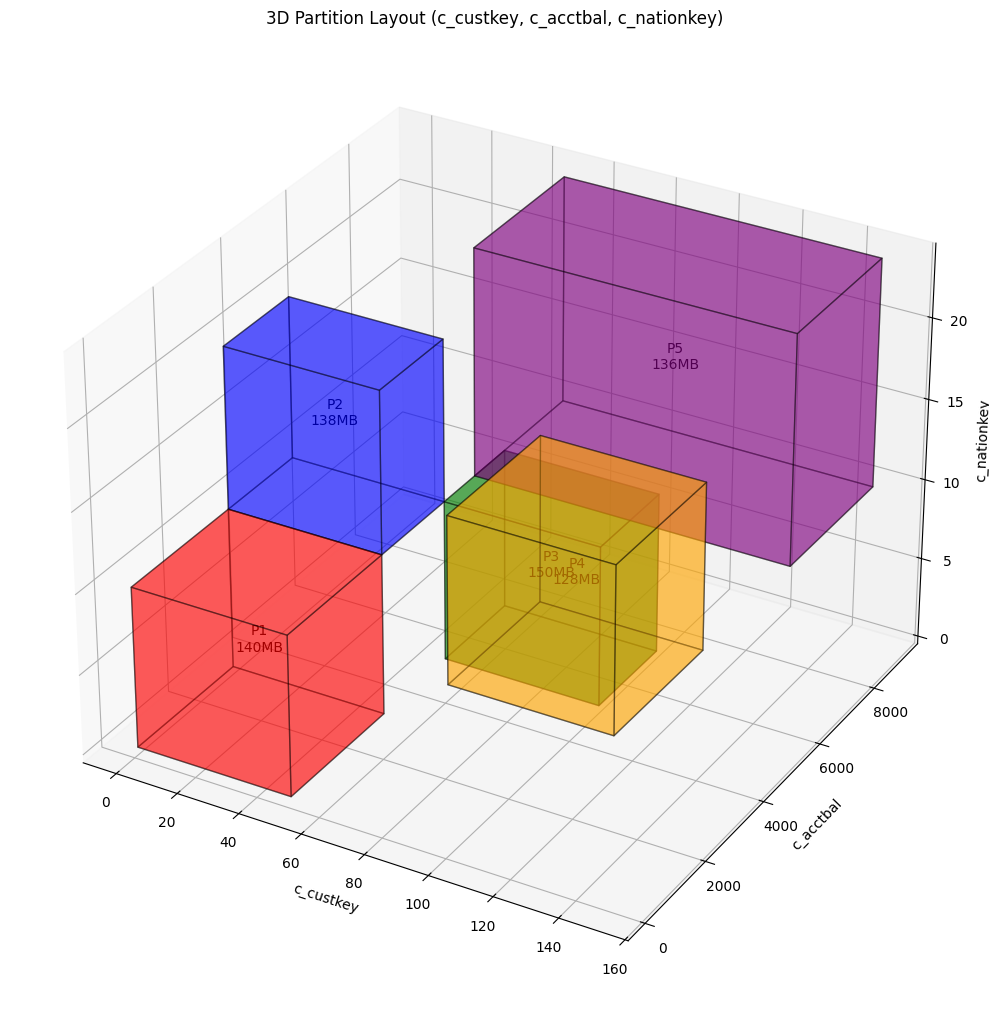

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Define partition bounds and sizes
partitions = {
    "P1": {"custkey": (0, 50), "acctbal": (100, 3000), "nationkey": (0, 10), "size": 140},
    "P2": {"custkey": (0, 50), "acctbal": (3000, 5000), "nationkey": (10, 20), "size": 138},
    "P3": {"custkey": (50, 100), "acctbal": (5000, 7000), "nationkey": (0, 10), "size": 150},
    "P4": {"custkey": (100, 150), "acctbal": (100, 3000), "nationkey": (10, 20), "size": 128},
    "P5": {"custkey": (50, 150), "acctbal": (6000, 9000), "nationkey": (10, 24), "size": 136},
}

# Create 3D plot
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'orange', 'purple']

def draw_cuboid(ax, bounds, color, label):
    x = bounds["custkey"]
    y = bounds["acctbal"]
    z = bounds["nationkey"]
    # Define the corners of the cuboid
    xx = [x[0], x[1]]
    yy = [y[0], y[1]]
    zz = [z[0], z[1]]

    vertices = np.array([
        [xx[0], yy[0], zz[0]], [xx[1], yy[0], zz[0]],
        [xx[1], yy[1], zz[0]], [xx[0], yy[1], zz[0]],
        [xx[0], yy[0], zz[1]], [xx[1], yy[0], zz[1]],
        [xx[1], yy[1], zz[1]], [xx[0], yy[1], zz[1]],
    ])
    faces = [
        [vertices[j] for j in [0, 1, 2, 3]],
        [vertices[j] for j in [4, 5, 6, 7]],
        [vertices[j] for j in [0, 1, 5, 4]],
        [vertices[j] for j in [2, 3, 7, 6]],
        [vertices[j] for j in [1, 2, 6, 5]],
        [vertices[j] for j in [4, 7, 3, 0]]
    ]
    poly3d = Poly3DCollection(faces, facecolors=color, alpha=0.4, edgecolor='k')
    ax.add_collection3d(poly3d)

    # Add label at the center of the cuboid
    cx = (x[0] + x[1]) / 2
    cy = (y[0] + y[1]) / 2
    cz = (z[0] + z[1]) / 2
    ax.text(cx, cy, cz, f"{label}\n{partitions[label]['size']}MB", color='black', ha='center', fontsize=10)

# Draw all partitions
for i, (label, bounds) in enumerate(partitions.items()):
    draw_cuboid(ax, bounds, colors[i], label)

ax.set_xlabel("c_custkey")
ax.set_ylabel("c_acctbal")
ax.set_zlabel("c_nationkey")
ax.set_title("3D Partition Layout (c_custkey, c_acctbal, c_nationkey)")

plt.tight_layout()
plt.show()
